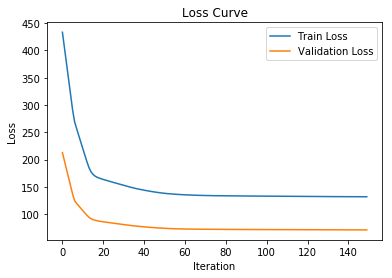

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_svmlight_file
from sklearn.externals.joblib import Memory
from matplotlib import pyplot as plt
import numpy as np

#读取数据
mem = Memory("./mycache")
@mem.cache
def get_data():
    data = load_svmlight_file("F:/大三上/机器学习/实验一/australian_scale.txt")
    return data[0], data[1]
X,y= get_data()
X = X.toarray()

#在训练集前添加一列1
X = np.c_[np.ones(len(X)), X]

#切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#初始化
W = np.zeros(X_train.shape[1])

#选择Loss函数及对其求导

def hinge_loss(x):
    return max(0,1 - x)
def L(X,y,W,C):
    return (W ** 2).sum() / 2 + C * sum(map(hinge_loss, y * (np.dot(X, W))))
def Gra(X,y,W,C):
    temp = np.zeros(len(W))
    for i in range(X.shape[0]):
        if y[i] * np.dot(X[i,:], W) < 1:
            temp += -y[i] * X[i,:]
    return W + C * temp

L_train = []
L_validation = []

num=150   
C=0.9    
learning_rate = 0.0001 
#求得所有样本对Loss函数的梯度的平均值
for i in range(num):
    G = Gra(X,y,W,C)
    
    #更新模型参数
    W = W - learning_rate * G    
    #在训练集上测试并得到Loss函数值
    L_train.append(L(X_train,y_train,W,C))
    L_validation.append(L(X_test,y_test,W,C))

#画出随迭代次数的变化图
plt.title('Loss Curve')
plt.plot(range(num),L_train,label="Train Loss")
plt.plot(range(num),L_validation,label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()